In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/heart failur classification dataset.csv')
data.head(5)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1


In [3]:
data.isnull().sum()


Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(data[['serum_sodium']])

data['serum_sodium'] = impute.transform(data[['serum_sodium']])
impute.fit(data[['time']])

data['time'] = impute.transform(data[['time']])
data.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
data.head(5)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,Female,No,8.0,1


In [6]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['sex_enc'] = enc.fit_transform(data['sex'])
data['smoking_enc'] = enc.fit_transform(data['smoking'])


data.head(5)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,sex_enc,smoking_enc
0,0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,Male,No,4.0,1,1,0
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,Male,No,6.0,1,1,0
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,Male,Yes,7.0,1,1,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,Male,No,7.0,1,1,0
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,Female,No,8.0,1,0,0


In [7]:
X = data.drop(['sex','smoking','sex_enc','smoking_enc'], axis = 1)
X.head(5)


,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,8.0,1


In [8]:
Y= data.sex_enc
Y.head(5)


0    1
1    1
2    1
3    1
4    0
Name: sex_enc, dtype: int64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [10]:
model = LogisticRegression()

model.fit(x_train, y_train) 
predictions = model.predict(x_test)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


In [11]:
LR_Accuracy = accuracy_score(y_test, predictions)
print(LR_Accuracy)

0.6333333333333333


In [22]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
mlp.fit(x_train, y_train)
predictions = mlp.predict(x_test)
Neural_accuracy=accuracy_score(y_test,predictions)
print("Neural Network accuracy:",Neural_accuracy)

Neural Network accuracy: 0.6


In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)
Random_forest_accuracy=accuracy_score(y_test,predictions)
print("Random Forest Accuracy:",Random_forest_accuracy)

Random Forest Accuracy: 0.6666666666666666


In [24]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
predictions = svc.predict(x_test)
Support_vector_accuracy=accuracy_score(y_test,predictions)
print("SVM Accuracy:",Support_vector_accuracy)

SVM Accuracy: 0.5333333333333333


In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
components= pca.fit_transform(X)
print("variance_ratio:",sum(pca.explained_variance_ratio_))
principal_dataframe = pd.DataFrame(data=components, columns=["Component 1", "Component 2"
,"Component 3","Component 4","Component 5","Component 6"])
data2=pd.concat([principal_dataframe,Y], axis=1)
data2.head()

variance_ratio: 0.9999999979151973


,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,sex_enc
0,1641.968257,-0.055375,-194.979235,6.862475,-18.056322,5.731808,1
1,1.765360,7279.342157,-185.575289,-2.120615,2.709267,-5.445220,1
2,-101358.134430,-411.050738,-190.469501,13.430164,-12.004385,-0.662397,1
3,-53358.144227,-457.685080,-189.950081,22.666929,-2.256708,-6.960099,1
4,63641.864084,-437.103336,-190.303088,14.591391,-13.679122,1.165636,0


In [27]:
newX=data2.drop(['sex_enc'], axis = 1)
newY=data2['sex_enc']
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(newX, newY, test_size=0.2)
newX.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
0,1641.968257,-0.055375,-194.979235,6.862475,-18.056322,5.731808
1,1.765360,7279.342157,-185.575289,-2.120615,2.709267,-5.445220
2,-101358.134430,-411.050738,-190.469501,13.430164,-12.004385,-0.662397
3,-53358.144227,-457.685080,-189.950081,22.666929,-2.256708,-6.960099
4,63641.864084,-437.103336,-190.303088,14.591391,-13.679122,1.165636


In [28]:
from sklearn.svm import SVC
ssvc = SVC(kernel="linear")
ssvc.fit(pca_x_train, pca_y_train)
pca_predictions = ssvc.predict(pca_x_test)
pca_vector_accuracy=accuracy_score(pca_y_test,pca_predictions)
print("SVC Accuracy after pca:",pca_vector_accuracy)

SVC Accuracy after pca: 0.5166666666666667


In [29]:
from sklearn.neural_network import MLPClassifier
nnnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=1000000000)
nnnc.fit(pca_x_train, pca_y_train)
pca_neural_predictions = nnnc.predict(pca_x_test)
pca_neural_accuracy=accuracy_score(y_test,pca_neural_predictions)
print("Neural Network Accuracy after pca:",pca_neural_accuracy)

Neural Network Accuracy after pca: 0.6666666666666666


In [19]:
from sklearn.ensemble import RandomForestClassifier
rrfc = RandomForestClassifier(n_estimators=100)
rrfc.fit(pca_x_train, pca_y_train)
pca_random_predictions = rrfc.predict(pca_x_test)
pca_random_accuracy=accuracy_score(pca_y_test,pca_random_predictions)
print("Random Forest Accuracy after pca:",pca_random_accuracy)

Random Forest Accuracy after pca: 0.6666666666666666


In [20]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
fig = plt.figure(figsize = (10, 5))

<Figure size 720x360 with 0 Axes>

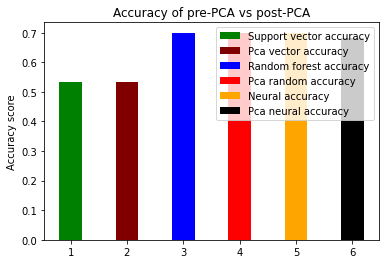

In [21]:
# creating the bar plot
plt.bar(1, Support_vector_accuracy, color ='Green',
width = 0.4,label ="Support vector accuracy")
plt.bar(2,pca_vector_accuracy, color ='maroon',
width = 0.4, label='Pca vector accuracy')
plt.bar(3, Random_forest_accuracy, color ='blue',
width = 0.4, label='Random forest accuracy')
plt.bar(4,pca_random_accuracy, color ='red',
width = 0.4, label='Pca random accuracy')
plt.bar(5, Neural_accuracy, color ='Orange',
width = 0.4, label='Neural accuracy')
plt.bar(6,pca_neural_accuracy, color ='black',
width = 0.4, label='Pca neural accuracy')
plt.legend()
plt.ylabel("Accuracy score")
plt.title("Accuracy of pre-PCA vs post-PCA")
plt.show()